In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from skimage.io import imread, imshow
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [5]:
# Enable inline plotting for Jupyter
%matplotlib inline

In [10]:
# Load and count images in each class
data_dir = '/Users/faheemjinna/Downloads/ML Project/soil_dataset/Train'
classes = ['Alluvial Soil', 'Black Soil', 'Clay Soil', 'Red Soil']

In [11]:
image_counts = {}
for soil_type in classes:
    image_counts[soil_type] = len(os.listdir(os.path.join(data_dir, soil_type)))

# Display total image count
total_images = sum(image_counts.values())
print(f"Total images: {total_images}")
for soil, count in image_counts.items():
    print(f"{soil}: {count} images")

Total images: 1215
Alluvial Soil: 523 images
Black Soil: 228 images
Clay Soil: 197 images
Red Soil: 267 images


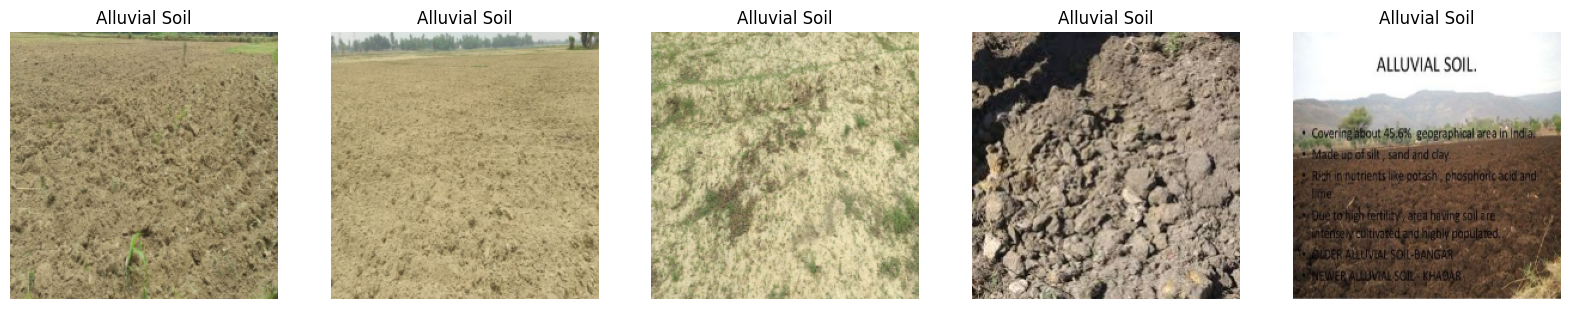

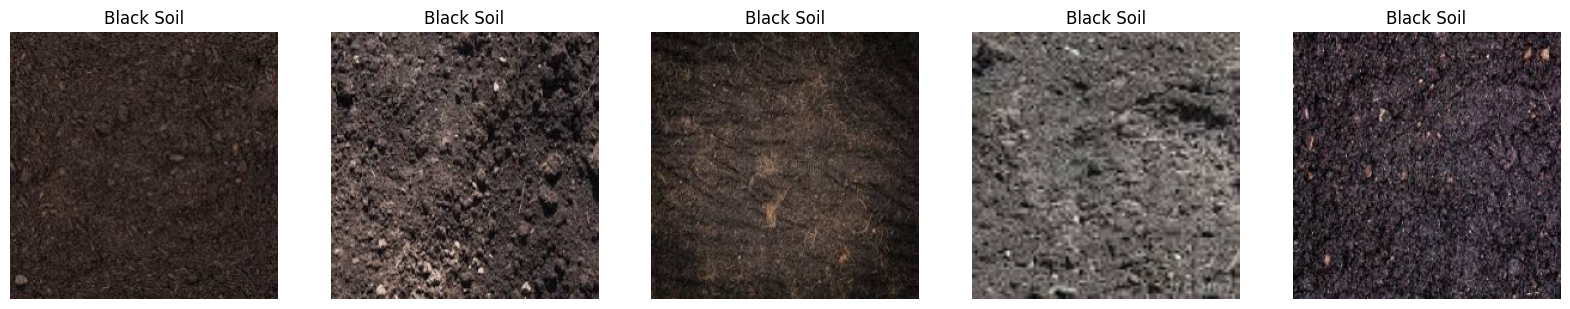

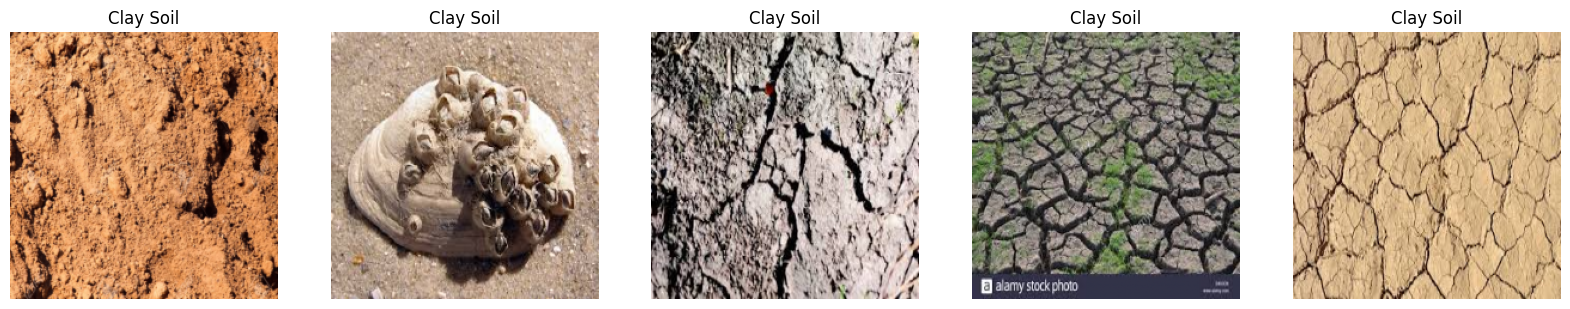

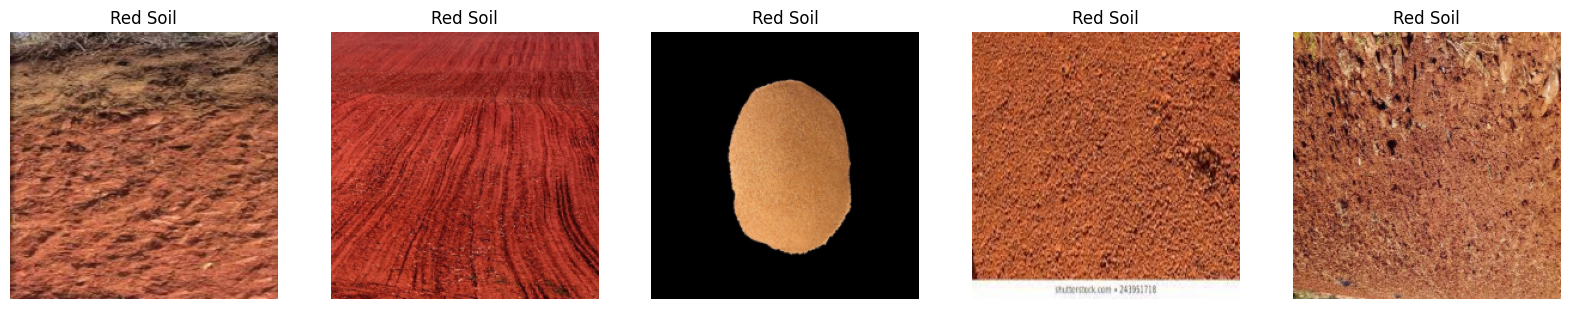

In [12]:

# Visualize sample images from each class
def visualize_samples(soil_class, num_images=5):
    """Displays a few sample images from a given soil class."""
    fig, ax = plt.subplots(1, num_images, figsize=(20, 5))
    soil_images = os.listdir(os.path.join(data_dir, soil_class))
    for i in range(num_images):
        rand_idx = np.random.randint(len(soil_images))
        img = imread(os.path.join(data_dir, soil_class, soil_images[rand_idx]))
        img = resize(img, (224, 224))
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(soil_class.replace('_', ' '))

# View samples for each soil type
for soil_type in classes:
    visualize_samples(soil_type)

In [16]:
# Data Augmentation for robust training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Prepare training and testing datasets
train_dataset = train_datagen.flow_from_directory(
    directory='/Users/faheemjinna/Downloads/ML Project/soil_dataset/Test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

test_dataset = test_datagen.flow_from_directory(
    directory='/Users/faheemjinna/Downloads/ML Project/soil_dataset/Test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 340 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [17]:
# Model architecture
model = Sequential()

# Input Layer
model.add(InputLayer(input_shape=(224, 224, 3)))

# Convolutional layers with Batch Normalization and Dropout
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for multi-class classification
model.add(Dense(units=4, activation='softmax'))

# Summary of the model
model.summary()

/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,280,516 (84.99 MB)

 Trainable params: 22,279,300 (84.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [19]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks for training
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='best_weights.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
]


In [20]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    callbacks=callbacks,
    verbose=1
)


/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4164 - loss: 1.7802 
Epoch 1: val_accuracy improved from -inf to 0.32647, saving model to best_weights.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 111s 18s/step - accuracy: 0.4346 - loss: 1.7301 - val_accuracy: 0.3265 - val_loss: 1.3309 - learning_rate: 1.0000e-04
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.7009 - loss: 0.7757 
Epoch 2: val_accuracy improved from 0.32647 to 0.58235, saving model to best_weights.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 130s 22s/step - accuracy: 0.7016 - loss: 0.7803 - val_accuracy: 0.5824 - val_loss: 1.2045 - learning_rate: 1.0000e-04
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.7684 - loss: 0.6818 
Epoch 3: val_accuracy improved from 0.58235 to 0.60294, saving model to best_weights.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 115s 19s/step - accuracy: 0.7645 - loss: 0.6911 - val_accuracy: 0.6029 - val_loss: 1.1836 - learning_rate: 1.0000e-04
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step 

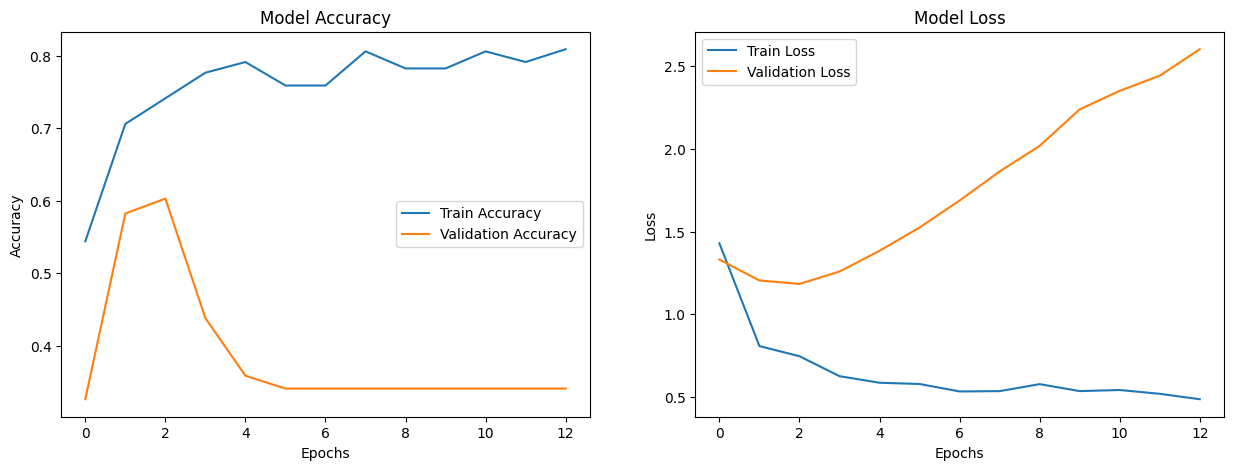

In [21]:
# Plot training history
def plot_history(history):
    """Plots the training and validation accuracy and loss."""
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Loss
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Display the training results
plot_history(history)